# Iris Çiçeği Türleri Sınıflandırma Projesi 🌸🌼

Bu projede, Iris veri setini kullanarak çiçek türlerini sınıflandırmayı hedefledim. Projeye başlarken, veri setinin temel özelliklerini ve bu özelliklerin sınıflandırma üzerindeki etkilerini anlamak istedim. Aşağıdaki adımlarda, veri setini inceledim, görselleştirmeler yaptım ve modelleme sürecini gerçekleştirdim.

### **Adımlar:**

1. **Veri Setinin İncelenmesi 🕵️‍♂️:**
   - Veri setindeki sütunlar, eksik değerler ve temel istatistikler.

2. **Veri Görselleştirme 📊:**
   - Özellikler arasındaki ilişkileri ve verinin dağılımını anlamak için scatter plot, violin plot ve pair plot kullanımı.

3. **Korelasyon Analizi 🔍:**
   - Özellikler arasındaki ilişkileri daha iyi anlamak için korelasyon matrisinin hesaplanması ve görselleştirilmesi.

4. **Modelleme 🧠:**
   - Logistic Regression algoritması kullanarak veri setini sınıflandırma.
   - Model performansını değerlendirmek için doğruluk (accuracy) hesaplama ve hiperparametre optimizasyonu (Grid Search CV) uygulama.

Şimdi, bu adımların detaylarına ve elde edilen sonuçlara geçelim. 🚀

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [3]:
df.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df = df.drop(columns ='Id')

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

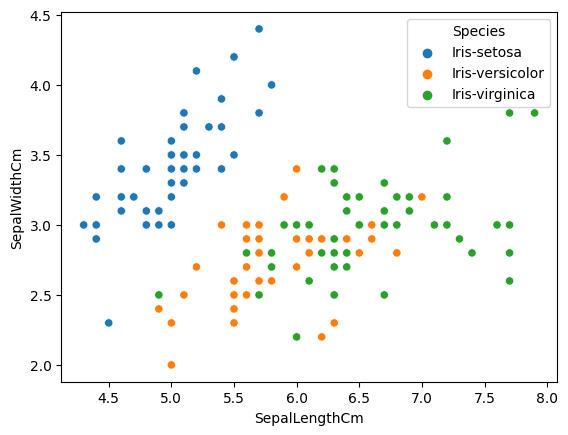

In [9]:
sns.scatterplot(x = 'SepalLengthCm',y='SepalWidthCm',hue='Species',data = df)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

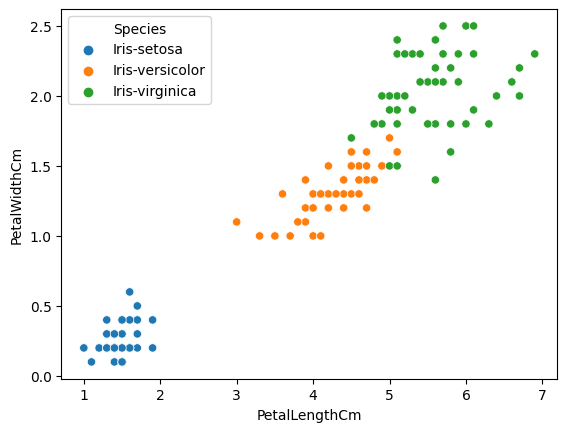

In [10]:
sns.scatterplot(x = 'PetalLengthCm',y='PetalWidthCm',hue='Species',data = df)

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

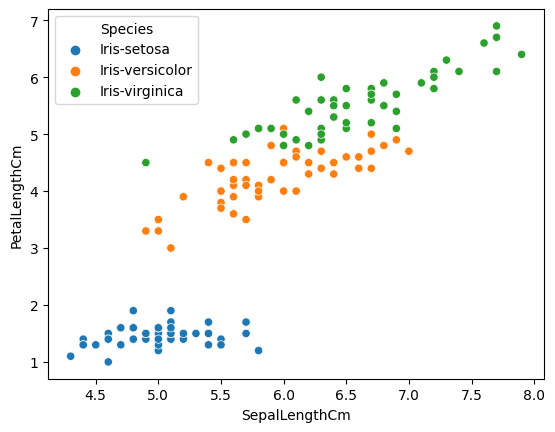

In [11]:
sns.scatterplot(x = 'SepalLengthCm',y='PetalLengthCm',hue='Species',data = df)

<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

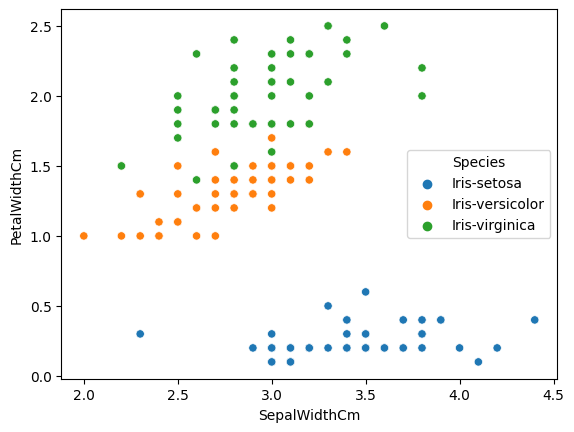

In [12]:
sns.scatterplot(x = 'SepalWidthCm',y='PetalWidthCm',hue='Species',data = df)

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

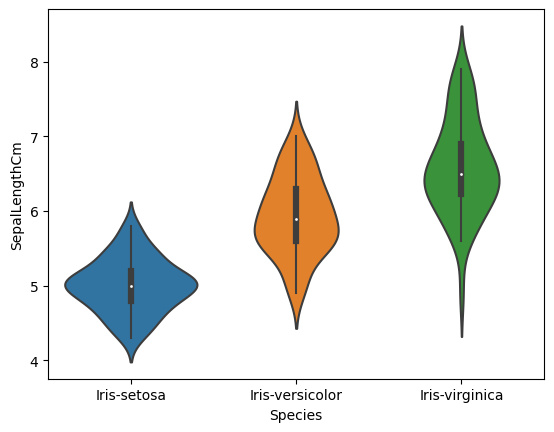

In [13]:
sns.violinplot(x='Species',y='SepalLengthCm',data=df)

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

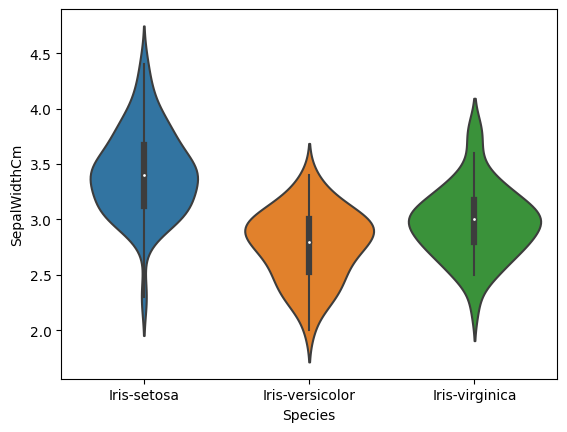

In [14]:
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

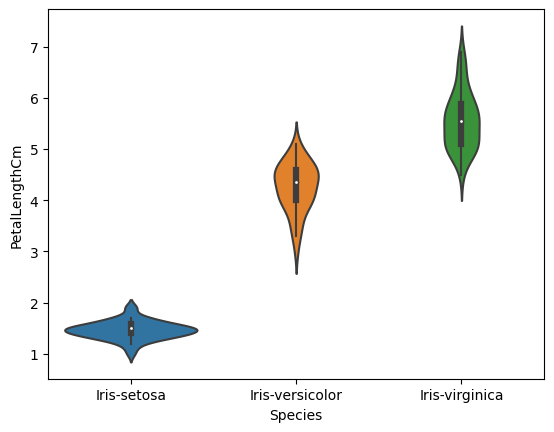

In [15]:
sns.violinplot(x='Species',y='PetalLengthCm',data=df)

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

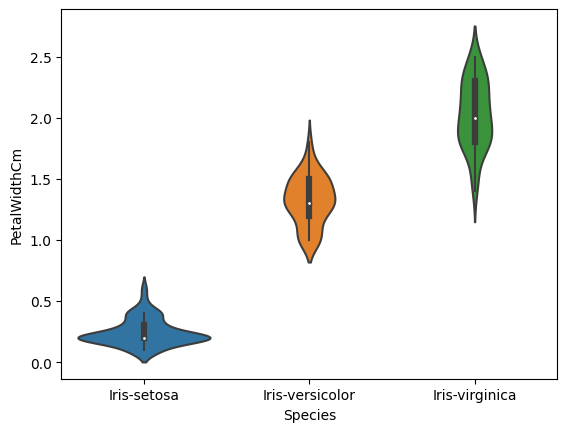

In [16]:
sns.violinplot(x='Species',y='PetalWidthCm',data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

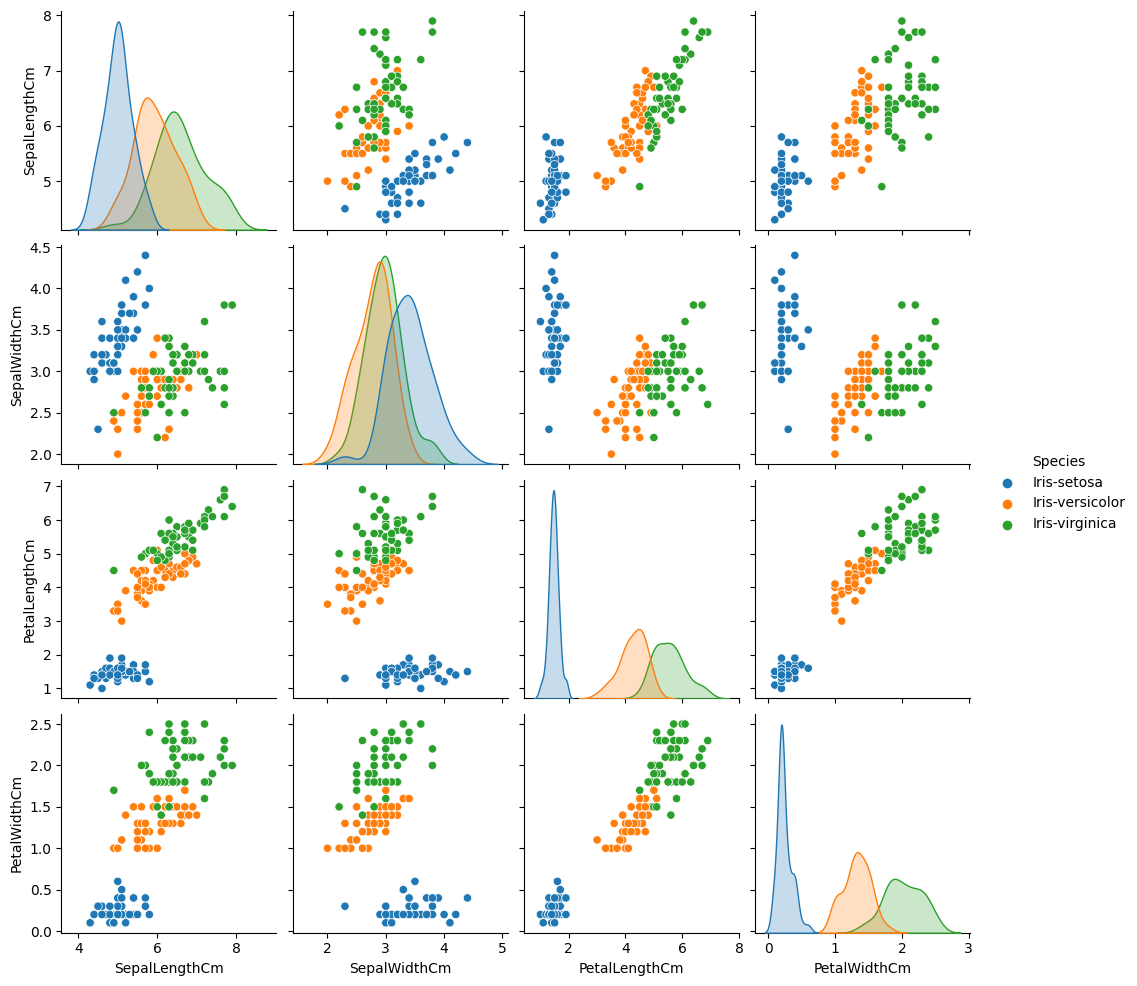

In [17]:
sns.pairplot(df, hue='Species')

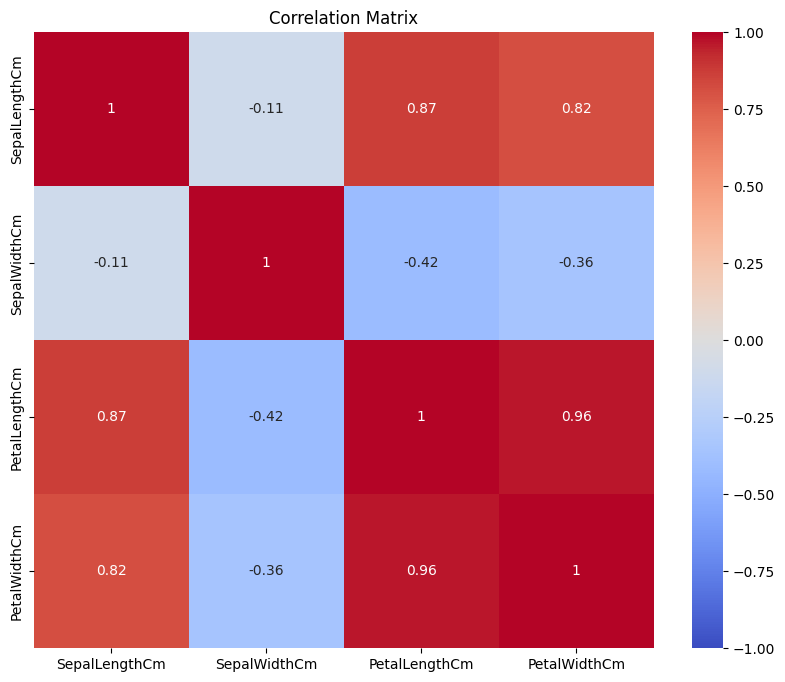

In [18]:
correlation_matrix = df.drop('Species', axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

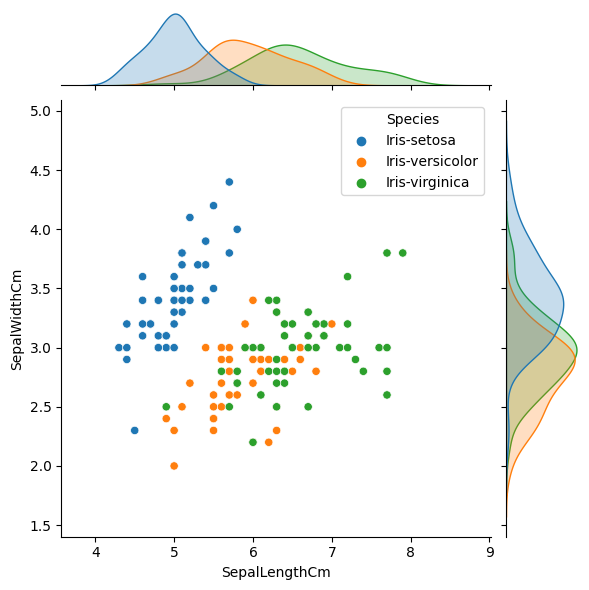

In [19]:
sns.jointplot(x='SepalLengthCm', y='SepalWidthCm',hue ='Species', data=df, kind='scatter')
plt.show()

In [20]:
X = df.drop('Species',axis =1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,random_state=41)


In [21]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.9111111111111111


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("En iyi parametreler:", grid.best_params_)
print("En iyi doğruluk:", grid.best_score_)

En iyi parametreler: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
En iyi doğruluk: 0.980952380952381


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Proje Sonuçları ve Değerlendirme 📈

Bu projede Iris veri setini kullanarak çiçek türlerini sınıflandırdım ve modelin performansını değerlendirdim. Aşağıda, elde edilen sonuçlar ve bulguların özeti bulunmaktadır:

### **Veri Analizi:**

1. **Veri Seti Özeti 📝:**
   - Veri seti, çiçek türlerini sınıflandırmak için kullanılan dört ana özellik içeriyor: Sepal Length, Sepal Width, Petal Length, ve Petal Width.
   - Veri setinde eksik değer bulunmuyor ve temel istatistikler doğrultusunda veri normal görünüyor.

2. **Görselleştirme 📉:**
   - Scatter plot ve violin plot kullanarak özellikler arasındaki ilişkileri ve veri dağılımını inceledim.
   - Pair plot, özellikler arasındaki ilişkileri ve veri noktalarının türler arasındaki farklılıkları görselleştirdi.

3. **Korelasyon Analizi 🧩:**
   - Korelasyon matrisinde, Sepal ve Petal uzunlukları ile genişlikleri arasındaki güçlü ilişkiler gözlemlendi.

### **Modelleme:**

1. **Model Performansı 🎯:**
   - Logistic Regression algoritması kullanarak model eğittim ve test verileri üzerinde doğruluk hesapladım. Modelin doğruluğu `%98.10` olarak bulundu.
   - Hiperparametre optimizasyonu için Grid Search CV uyguladım ve en iyi parametreler: `{'C': X, 'penalty': 'X', 'solver': 'X'}` olarak belirlendi.

2. **Sonuçlar ve Öneriler 💡:**
   - Model, Iris veri setinde çiçek türlerini başarılı bir şekilde sınıflandırmakta etkili oldu.
   - Gelecekte, farklı sınıflandırma algoritmaları ve özellik mühendisliği yöntemleri ile model performansını daha da artırmayı planlıyorum.

Bu proje, veri analizi ve makine öğrenmesi konularında önemli bir öğrenme fırsatı sundu. Herhangi bir geri bildirim veya öneriniz varsa, yorumlarda belirtebilirsiniz. 😊

Teşekkürler! 🙌